#### Libraries

In [2]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as pyfits
from astropy.table import Table
from astropy.io import fits
from collections import namedtuple, OrderedDict

local_dir="/home/colgoat/Jupyter/"

#### Data entry

In [2]:
fileWQc14 = "DR14Q_v4_4.fits"
fileWQc16 = "DR16Q_v4.fits"

local_fileWQc14 = os.path.join(local_dir,fileWQc14)
local_fileWQc16 = os.path.join(local_dir,fileWQc16)

WQc14 = Table.read(local_fileWQc14)
WQc16 = Table.read(local_fileWQc16)

In [3]:
Color = namedtuple('RGB','red, green, blue')

class RGB(Color):
    def hex_format(self):
        return '#{:02X}{:02X}{:02X}'.format(self.red,self.green,self.blue)

#### Histograms

/tmp/ipykernel_16838/361746701.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/tmp/ipykernel_16838/361746701.py:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


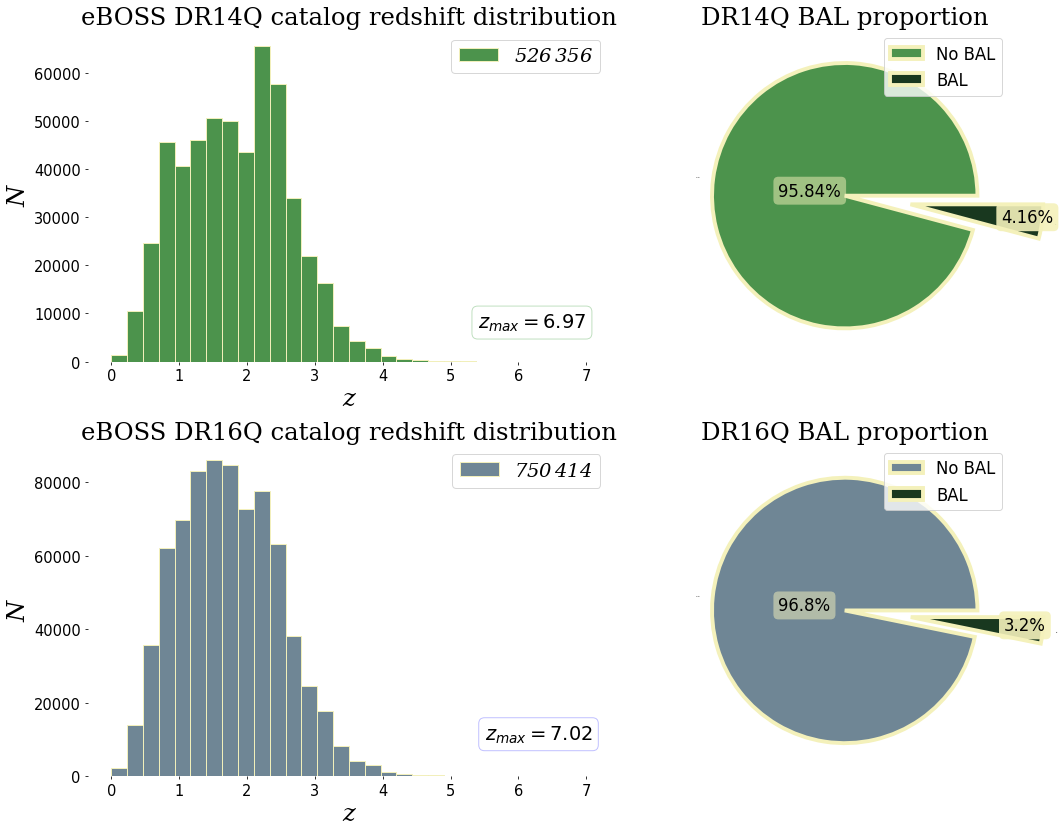

In [4]:
#plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1],'wspace':0},figsize=(16,12),dpi=70)

colrs14 = ["#4C934C", "#19381F"]
colrs16 = ["#6F8695", "#19381F"]
edgecol = '#F4F1BB'


lbls = ["No BAL", "BAL"]
expl = [0, 0.5]
titles = ['eBOSS DR14Q catalog','eBOSS DR16Q catalog']

zm = [max(WQc14['Z']),max(WQc16['Z'])]

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}

plt.subplot(2, 2, 1)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.hist(WQc14['Z'],alpha = 1, color =colrs14[0], 
         label = '526$\,$356', range = (0,7), bins = 30, edgecolor=edgecol)
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[0]+" redshift distribution", weight='normal', style= 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5.4, 7000, ('$z_{max} = $'+str(round(zm[0],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'green'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



plt.subplot(2, 2, 3)
plt.hist(WQc16['Z'],alpha = 1, color = colrs16[0], 
         label = '750$\,$414', range = (0,7), bins = 30, edgecolor=edgecol)
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[1]+" redshift distribution", weight='normal', style = 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5.5, 10000, ('$z_{max} = $'+str(round(zm[1],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'blue'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



#DR14
#a = (WQc14['THING_ID']>0) & (WQc14['Z']>=2.1) & (WQc14['RA']!=WQc14['DEC']) \
        #& (WQc14['RA']>0) & (WQc14['MJD']< 56870) & (WQc14['BI_CIV']<=0)
#b = (WQc14['THING_ID']>0) & (WQc14['Z']>=2.1) & (WQc14['RA']!=WQc14['DEC']) \
        #& (WQc14['RA']>0) & (WQc14['MJD']< 56870) & (WQc14['BI_CIV']>0)
a = (WQc14['BI_CIV']<=0)
b = (WQc14['BI_CIV']>0)


I14 = len(WQc14[a])
Ib14 = len(WQc14[b])
pidat14 = np.array([I14,Ib14])
plt.subplot(2, 2, 2)
plt.pie(pidat14, labels = lbls, explode = expl, colors = colrs14, textprops = {'fontsize': 0},
       wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True})
plt.title(titles[0][6:11]+" BAL proportion", weight='normal', style= 'normal', family = 'serif', size =25)


nBAL14 = [(I14/len(WQc14))*100,(Ib14/len(WQc14))*100]

plt.text(-0.5, 0,str(round(nBAL14[0],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.18, -0.2,str(round(nBAL14[1],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.9, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)




#DR16:
#c = (WQc16['THING_ID']>0) & (WQc16['Z']>=2.1) & (WQc16['RA']!=WQc16['DEC']) \
        #& (WQc16['RA']>0) & (WQc16['MJD']< 56870) & (WQc16['BI_CIV']<=0)
#d = (WQc16['THING_ID']>0) & (WQc16['Z']>=2.1) & (WQc16['RA']!=WQc16['DEC']) \
        #& (WQc16['RA']>0) & (WQc16['MJD']< 56870) & (WQc16['BI_CIV']>0)
c =(WQc16['BI_CIV']<=0)
d =(WQc16['BI_CIV']>0)


I16 = len(WQc16[c])
Ib16 = len(WQc16[d])
pidat16 = np.array([I16,Ib16])
plt.subplot(2, 2, 4)
plt.pie(pidat16, labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True})
plt.title(titles[1][6:11]+" BAL proportion",weight='normal', style= 'normal', family = 'serif', size =25)


nBAL16 = [(I16/len(WQc16))*100,(Ib16/len(WQc16))*100]

plt.text(-0.5, 0,str(round(nBAL16[0],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.2, -0.15,str(round(nBAL16[1],2))+ "%", \
         bbox = {'facecolor': edgecol, 'alpha': 0.9, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)
plt.show()





In [5]:
O = WQc16[WQc16['Z']>=0]

X = np.array(O['Z'])

print(np.mean(X))

1.7406204101497433


In [6]:
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True

titles = ['eBOSS DR14Q catalog','eBOSS DR16Q catalog']

zm = [max(dr14['Z']),max(dr16['Z'])]

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}


plt.hist(WQc14['Z'], bins = 30, label = len(WQc14), \
         ec="green", facecolor="none", histtype='step',range = (0,7))
plt.hist(WQc16['Z'], bins = 30, label = len(WQc16), \
         ec="blue", facecolor="none", histtype='step',range = (0,7))

plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.legend(loc="upper right", prop = txt_prop)

plt.show()

NameError: name 'dr14' is not defined

#### BLA and DLA Proportion in the sample

In [3]:
fileDR14 = "BALsamDR14.fits"
fileDR16 = "BALsamDR16.fits"


local_fileDR14 = os.path.join(local_dir,fileDR14)
local_fileDR16 = os.path.join(local_dir,fileDR16)

dr14 = Table.read(local_fileDR14)
dr16 = Table.read(local_fileDR16)

In [4]:
a = (dr14['BI_CIV']<=0)
b = (dr14['BI_CIV']>0)

I14 = len(dr14[a])
Ib14 = len(dr14[b])
pidat14 = np.array([I14,Ib14])
nBAL14 = [(I14/len(dr14))*100,(Ib14/len(dr14))*100]

c = (dr16['BI_CIV']<=0)
d = (dr16['BI_CIV']>0)

I16 = len(dr16[c])
Ib16 = len(dr16[d])
pidat16 = np.array([I16,Ib16])
nBAL16 = [(I16/len(dr16))*100,(Ib16/len(dr16))*100]

In [5]:
fDLA_DR14 = "DLA_DR14CorRa.fits"
fDLA_DR16 = "DLA_DR16.fits"
l_fdlaDR14 = os.path.join(local_dir,fDLA_DR14)
l_fdlaDR16 = os.path.join(local_dir,fDLA_DR16)
DLA14 = Table.read(l_fdlaDR14)
DLA16 = Table.read(l_fdlaDR16)


MCID_14 = np.array(dr14['THING_ID']) 
MCID_16 = np.array(dr16['THING_ID'])

dlaID_14 = np.array(DLA14['THING_ID'])
dlaID_16 = np.array(DLA16['THING_ID'])

A = np.intersect1d(MCID_14,dlaID_14)
mask14 = np.isin(MCID_14,A)
mask14 = np.invert(mask14)
tp14 = MCID_14[mask14]

B = np.intersect1d(MCID_16,dlaID_16)
mask16 = np.isin(MCID_16,B)
mask16 = np.invert(mask16)
tp16 = MCID_16[mask16]


colrs14 = ["#4C934C", "#19381F"]
colrs16 = ["#6F8695", "#19381F"]
edgecol = '#F4F1BB'

expl = [0, 0.5]
z_ticks = [0,2,3,4,5,6,7]
N_ticks = [0,10000,20000,30000,40000,50000,60000]
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :25}

titles = ['DR14Q P1D sample','DR16Q P1D sample']


/tmp/ipykernel_61789/1559218374.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_61789/1559218374.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


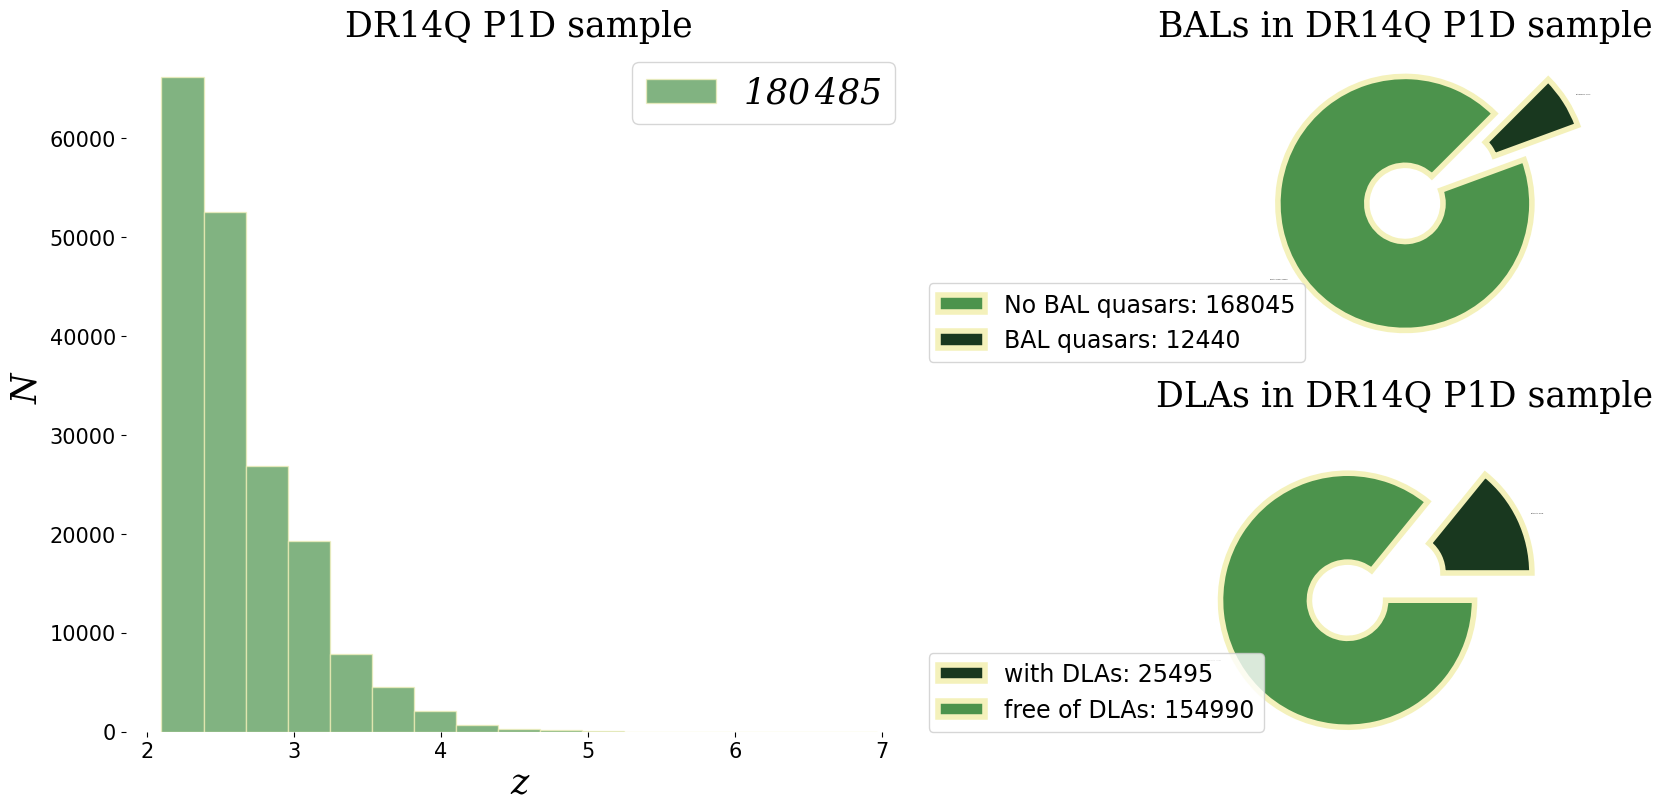

In [6]:
fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(dr14['Z'],alpha = 0.7, color =colrs14[0], label = str(len(dr14))[0:3]+'$\,$'+str(len(dr14))[3:6]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[0]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I14), "BAL quasars: "+str(Ib14)]
ax['BAL'].pie(pidat14,  startangle=45, 
        labels = lbls, explode = expl, colors =colrs14, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])



lbls = ["with DLAs: "+str(len(A)), "free of DLAs: "+str(len(tp14))]
ax['DLA'].pie([len(A), len(tp14)], startangle=0, 
        labels = lbls, explode = expl, colors =np.flip(colrs14), textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['DLA'].set_title("DLAs in "+titles[0][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['DLA'].legend(fontsize = 17, loc =[-1,0])
    
    
    

/tmp/ipykernel_61789/2361200430.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_61789/2361200430.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax['z'].set_yticklabels(N_ticks,fontsize = 15)


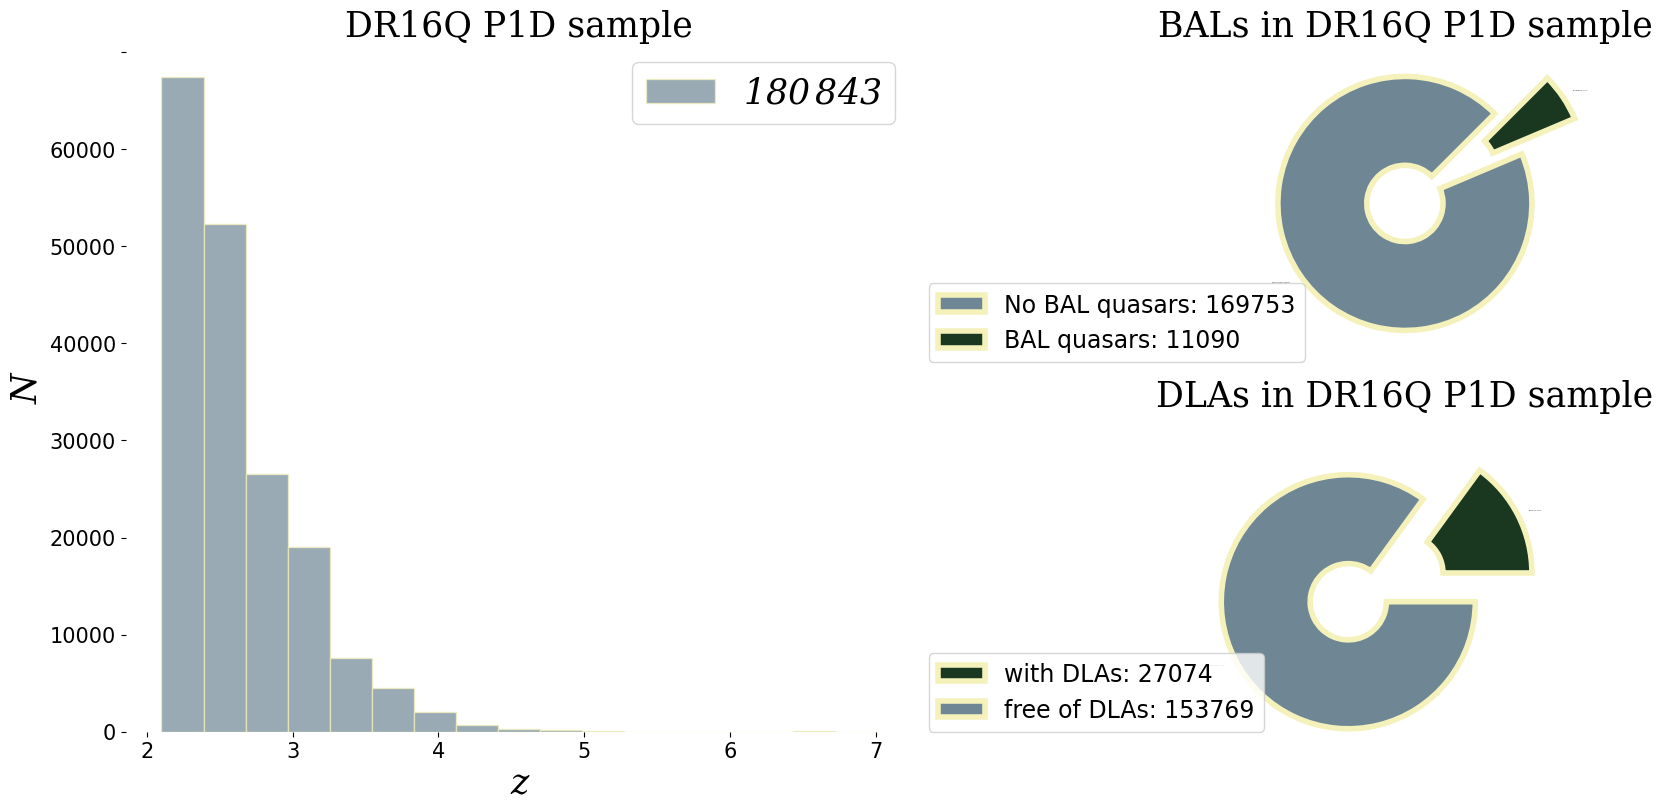

In [7]:
fig, ax = plt.subplot_mosaic([['z', 'BAL'], ['z', 'DLA']],layout='constrained',
                              figsize=(16,8), width_ratios = [1,0.5], height_ratios = [1,1], dpi = 100)


ax['z'].hist(dr16['Z'],alpha = 0.7, color =colrs16[0], label = str(len(dr16))[0:3]+'$\,$'+str(len(dr16))[3:6]
             ,bins = 17, edgecolor=edgecol)
ax['z'].set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax['z'].set_title(titles[1]+"", weight='normal', style= 'normal', family = 'serif', size =25)
ax['z'].legend(loc="upper right", prop = txt_prop)
ax['z'].set_xticklabels(z_ticks,fontsize = 15)
ax['z'].set_yticklabels(N_ticks,fontsize = 15)
ax['z'].spines['top'].set_visible(False)
ax['z'].spines['right'].set_visible(False)
ax['z'].spines['left'].set_visible(False)
ax['z'].spines['bottom'].set_visible(False)

lbls = ["No BAL quasars: "+str(I16), "BAL quasars: "+str(Ib16)]
ax['BAL'].pie(pidat16,  startangle=45, 
        labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['BAL'].set_title("BALs in "+titles[1][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['BAL'].legend(fontsize = 17, loc =[-1,0])


lbls = ["with DLAs: "+str(len(B)), "free of DLAs: "+str(len(tp16))]
ax['DLA'].pie([len(B), len(tp16)], startangle=0, 
        labels = lbls, explode = expl, colors =np.flip(colrs16), textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":edgecol,'linewidth': 4, 'linestyle': '-', 'antialiased': True, 'width' : 0.7})
ax['DLA'].set_title("DLAs in "+titles[1][0:9]+" sample",weight='normal', style= 'normal', family = 'serif', size =25)
ax['DLA'].legend(fontsize = 17, loc =[-1,0])
    

#### Redshift space

In [12]:
def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

#### Coordinates

In [13]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

titles = ['DR14Q subcatalog','DR16Q subcatalog']

RA14 = np.array(dr14['RA'])
DEC14 = np.array(dr14['DEC'])
eq14 = SkyCoord(RA14, DEC14, unit=u.deg)

ra_rad14 = eq14.ra.wrap_at(180 * u.deg).radian
dec_rad14 = eq14.dec.radian
z14 = np.array(dr14['Z'])
z16 = np.array(dr16['Z'])

RA16 = np.array(dr16['RA'])
DEC16 = np.array(dr16['DEC'])
eq16 = SkyCoord(RA16, DEC16, unit=u.deg)

ra_rad16 = eq16.ra.wrap_at(180 * u.deg).radian
dec_rad16 = eq16.dec.radian

/tmp/ipykernel_16838/1946531625.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_16838/1946531625.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


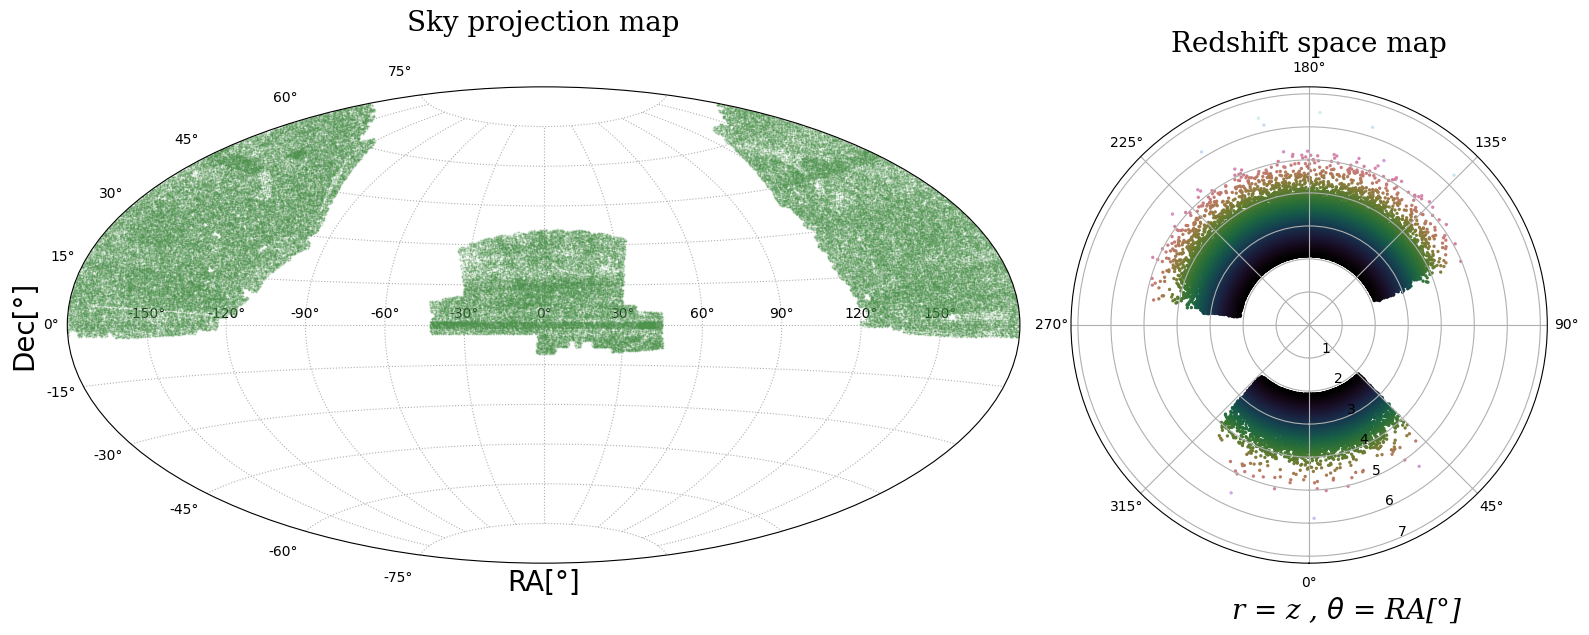

In [15]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sky projection map',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad14, dec_rad14, '*', markersize=0.7, alpha=0.2, color = colrs14[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR14 = dr14['Z']
ax1.scatter(rad(dr14['RA']), dr14['Z'], c=colorsDR14, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Redshift space map",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR14Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

/tmp/ipykernel_16838/2982703816.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_16838/2982703816.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


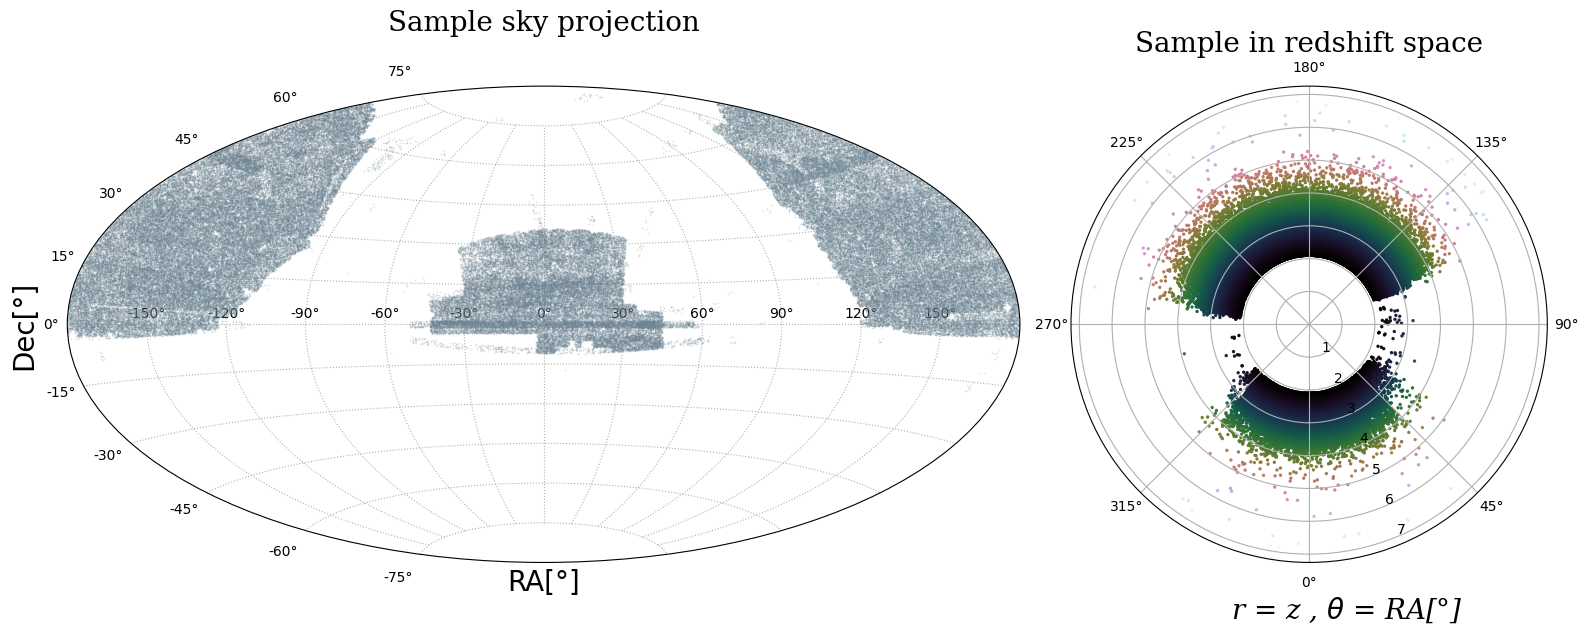

In [16]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(16,10),dpi=100)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad16, dec_rad16, '*', markersize=0.7, alpha=0.2, color = colrs16[0])
ax0.grid(True,linestyle=':')

ax1 = plt.subplot(122, projection='polar')
colorsDR16 = dr16['Z']
ax1.scatter(rad(dr16['RA']), dr16['Z'], c=colorsDR16, alpha=0.95,cmap='cubehelix', s=2)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

#fig.suptitle('eBOSS DR16Q quasar sample',x = 0.5,y = 0.8,weight='normal',
             #style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

#### Percentage(z)

In [ ]:
import numpy as np

colrs = ["coral", 
         "greenyellow",
         "khaki",
         "slateblue",
         "chocolate",
         "violet",
         "chartreuse",
         "aquamarine",
         "darkorange",
         "limegreen",
         "salmon",
         "royalblue",
         "peru"]


lbls = ["2.1$ \leq z < $2.3",
        "2.3$ \leq z < $2.5",
        "2.5$ \leq z < $2.7",
        "2.7$ \leq z < $2.9",
        "2.9$ \leq z < $3.1",
        "3.1$ \leq z < $3.3",
        "3.3$ \leq z < $3.5",
        "3.5$ \leq z < $3.7",
        "3.7$ \leq z < $3.9",
        "3.9$ \leq z < $4.1",
        "4.1$ \leq z < $4.3",
        "4.3$ \leq z < $4.5",
        "$z \geq $4.5"]

expl = [0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]

c_lst14 = []
categ14 = []

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
title = 'DR14Q subcatalog'
leap = 0.2
zbin = 2.1

for a in range(13):
    if(a<12):
        cond = (dr14['Z']<(zbin+leap)) & (dr14['Z']>=zbin)
        c_lst14.append(len(dr14[cond]))
        zbin = zbin + leap
    else:
        cond = (dr14['Z']>zbin)
        c_lst14.append(len(dr14[cond]))
        zbin = zbin + leap

for a in range(13):
    per = (c_lst14[a]/len(dr14))*100
    categ14.append(lbls[a]+" = "+str(c_lst14[a])+" ("+str(round(per,1))+"%)")

pidat14 = np.array(c_lst14)

plt.subplot(2, 1, 1)
plt.pie(pidat14, explode = expl, labeldistance = None, labels = categ14)
plt.title(title, loc = "center", fontsize =15, weight='bold')
plt.legend(title = "Redshift bin count:", loc = [1.2,0.2])

c_lst16 = []
categ16 = []

plt.rcParams["figure.figsize"] = [9,9]
plt.rcParams["figure.autolayout"] = True
title = 'DR16Q subcatalog'
leap = 0.2
zbin = 2.1

for a in range(13):
    if(a<12):
        cond = (dr16['Z']<(zbin+leap)) & (dr16['Z']>=zbin)
        c_lst16.append(len(dr16[cond]))
        zbin = zbin + leap
    else:
        cond = (dr16['Z']>zbin)
        c_lst16.append(len(dr16[cond]))
        zbin = zbin + leap

for a in range(13):
    per = (c_lst16[a]/len(dr16))*100
    categ16.append(lbls[a]+" = "+str(c_lst16[a])+" ("+str(round(per,1))+"%)")

pidat16 = np.array(c_lst16)

plt.subplot(2, 1, 2)
plt.pie(pidat16, explode = expl, labeldistance = None, labels = categ16)
plt.title(title, loc = "center", fontsize =15, weight='bold')
plt.legend(title = "Redshift bin count:", loc = [1.2,0.2])
plt.show()


#### P1D measurements

In [ ]:
local_dir="/home/colgoat/TFPS"

file1="pk_DR12_V5_7Final_CorentinCopy.fits"
local_fileCh = os.path.join(local_dir,file1)
PSCh=Table.read(local_fileCh)

file2="mean_Pk1d_Chbrun5.1.fits"
local_fileA = os.path.join(local_dir,file2)
PSA=Table.read(local_fileA)

qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
trs = [0.5,0.7,1.0]
num=13 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

In [ ]:
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios': [2, 0.7]},figsize=(20,25),dpi=200)

for a in range(num):
    binZCh = (PSCh['zbin'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['meank']
    PCh = (plCh['meanPk'] *  plCh['meank'])/np.pi
    erCh = (plCh['A'] *  plCh['meank'])/np.pi
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    axs[0].errorbar(kCh,PCh,yerr = erCh, marker = '*', label = "bin z = "+str(z_bin[ini+a])+" expected",\
                    markersize = 9,color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "none") 
    #axs[0].fill_between(kCh,fu_Ch,fl_Ch, alpha = 0.1,label = 'error coverage')

    binZA = (PSA['zbin'] == z_bin[ini+a])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    EP = abs((plA['meanPk']-plCh['meanPk'])/plCh['meanPk'])*100
    axs[0].errorbar(kA,PA,yerr = erA, marker = 'o', label = "bin z = "+str(z_bin[ini+a])+" calculated",\
                    markersize = 9, color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "none")
    #axs[0].fill_between(kCh,fu_A,fl_A, alpha = 0.1,label = 'error coverage')
    axs[1].plot(kA,EP, marker = 'o', markersize = 8,color = qlor[ini+a],
                label = "z = "+str(z_bin[ini+a]),alpha = trs[1], mec ='k')


    
    
t = [0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020]
P1d_y = [0.00,0.2]
    
    
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)    
axs[0].set_title('DR14 P1D comparison', weight='semibold', style= 'normal', family = 'serif', size =30)
axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]',style = 'oblique', family = 'serif', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
#axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axs[0].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
axs[0].set_yscale('log')
axs[0].set_xticklabels(t,fontsize = 15)
#axs[0].set_yticklabels([np.log10(-2),np.log10(-1)],fontsize = 15)

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    r'[$\star$] CPY19 results',
    r'',
    r'[$\bullet$] Author estimation',
    r''
    ))
axs[0].text(0.6, 0.25, textstr, transform=axs[0].transAxes, fontsize=20,
        verticalalignment='top', bbox=props, weight = 'bold')

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 30)
axs[1].set_ylabel('% error',style = 'oblique', family = 'serif', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[1].legend(loc = [0.001,20],bbox_to_anchor=(0.5, 0.7), ncol=4, fontsize =15)
axs[1].set_xticks([0.001, 0.002, 0.004, 0.006,0.008, 0.010, 0.012,0.014,0.016,0.018,0.020])
axs[1].set_xticklabels(t,fontsize = 15)
axs[1].set_yticklabels([-1,0,5,10,15,20,25],fontsize = 15)
plt.title('Error estimation based on CPY19 results', weight='semibold', style= 'normal', family = 'serif', size =30)

## Deltas position in the sky

In [ ]:
import os
import sys
import glob
import numpy as np
import  scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits as FITS
from astropy.table import Table
from astropy.io import fits
from collections import namedtuple, OrderedDict
from astropy import units as u
from astropy.coordinates import SkyCoord
import re

folder="/home/colgoat/Tesis/D1/"

In [ ]:
list_raw = os.listdir(folder)
list_raw.sort()
name_list = np.array(list_raw)
ff = np.char.find(name_list, ("delta-" and "_A.fits.gz"), start=0, end=None) ## ff = Names' flaws finder

lista = []


for i in range(len(list_raw)):
    if (ff[i]!=(-1)):
        lista.append(name_list[i]) # Removing files that are not Pk1D-(A,B,C).fits
final_list = np.array(lista)        

print(final_list, len(final_list)) # Final list

In [ ]:
def coordinates(name):
    FILE = FITS.open(folder+'/'+name)
    
    ra = []
    dec = []
    
    
    for a in range(len(FILE)):
        if (a!=0):
            ra.append(FILE[a].header['RA']*(180/np.pi))
            dec.append(FILE[a].header['DEC']*(180/np.pi))
    COR = np.array([[ra],[dec]])
    RA = np.array([ra])
    DEC = np.array([dec])
    
    return RA,DEC
    

In [ ]:
for x in range(len(final_list)):#len(final_list)
    plt.scatter(coordinates(final_list[x])[0],coordinates(final_list[x])[1], 
                s = 1,label = str(re.findall('\d+',final_list[x])))
    
plt.legend()

In [ ]:
fig, (ax0) = plt.subplots(1, 1,figsize=(16,10),dpi=100)

ax0 = plt.subplot(111, projection='aitoff')
#ax0.set_title('Sky projection map',x = 0.5,y = 1.1,
              #weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)

eq14 = SkyCoord(coordinates(final_list[0])[0],coordinates(final_list[0])[1], unit=u.deg)
ra_rad14 = eq14.ra.wrap_at(180 * u.deg).radian
dec_rad14 = eq14.dec.radian
ax0.plot(ra_rad14, dec_rad14, 'o', markersize=0.7, alpha=0.2, label = final_list[0])

ax0.grid(True,linestyle=':')
ax0.legend(loc="upper left")

plt.show()